In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIG_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [3]:
data_cg1 = np.load('../../../deterministic/224x32/data_at_more_obs_points_config1/coarse_grained_vel_temp_data_t=25.0_to_t=35.0_grid_32_more_obs_config1.npz')
data_cg2 = np.load('../../../deterministic/224x32/data_at_more_obs_points_config1/coarse_grained_vel_temp_data_t=35.0_to_t=45.0_grid_32_more_obs_config1.npz')


In [4]:
ua_truth_t1 = data_cg1['ua_truth'] # t25 to t35
ua_truth_t2 = data_cg2['ua_truth'] # t35 to t45
Ta_truth_t1 = data_cg1['Ta_truth'] # t25 to t35
Ta_truth_t2 = data_cg2['Ta_truth'] # t35 to t45

In [5]:
ua_truth_t1.shape, ua_truth_t2.shape

((10, 84, 2), (11, 84, 2))

In [6]:
gridpoints = data_cg1['gridpoints']

In [7]:
ua_truth = np.concatenate((ua_truth_t1, ua_truth_t2), axis=0)
Ta_truth = np.concatenate((Ta_truth_t1, Ta_truth_t2), axis=0)

In [8]:
n_tsteps = 21 
n_obs_points = gridpoints.shape[0]
n_stoch_sim_1 = 50
n_stoch_sim_2 = 50

In [9]:
# calculating 1-std data for x-vel from all stochastic simulations at all points
vel_x_std_data_plus = np.zeros((n_tsteps,n_obs_points))
vel_x_std_data_minus = np.zeros((n_tsteps,n_obs_points))
vel_x_mean_mat = np.zeros((n_tsteps,n_obs_points))

vel_y_std_data_plus = np.zeros((n_tsteps,n_obs_points))
vel_y_std_data_minus = np.zeros((n_tsteps,n_obs_points))
vel_y_mean_mat = np.zeros((n_tsteps,n_obs_points))
for l in range(n_obs_points):
    vel_x_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim_1)) # at a location
    vel_y_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim_1))
    for k in range(n_stoch_sim_1):
        data_stoch = np.load('../data_stoch_more_obs/vel_temp_data_particle_'+str(k+1)+'_var_99_grid_32_t25_onwards_OU_rand_ic_m_obs.npz')
        vel_data_stoch = data_stoch['ua_data_sto']  
        vel_x_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 0]
        vel_y_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 1]

    vel_x_data_mean = np.mean(vel_x_data_stoch_mat, axis = 1, keepdims=True)
    vel_x_data_std = np.std(vel_x_data_stoch_mat, axis = 1, keepdims=True)

    vel_y_data_mean = np.mean(vel_y_data_stoch_mat, axis = 1, keepdims=True)
    vel_y_data_std = np.std(vel_y_data_stoch_mat, axis = 1, keepdims=True)

    vel_x_std_plus = vel_x_data_mean + vel_x_data_std
    vel_x_std_minus = vel_x_data_mean - vel_x_data_std

    vel_y_std_plus = vel_y_data_mean + vel_y_data_std
    vel_y_std_minus = vel_y_data_mean - vel_y_data_std

    vel_x_std_data_plus[:,l] = vel_x_std_plus[:,0]
    vel_x_std_data_minus[:,l] = vel_x_std_minus[:,0]
    vel_x_mean_mat[:,l] = vel_x_data_mean[:,0]

    vel_y_std_data_plus[:,l] = vel_y_std_plus[:,0]
    vel_y_std_data_minus[:,l] = vel_y_std_minus[:,0]
    vel_y_mean_mat[:,l] = vel_y_data_mean[:,0]

In [10]:
# results from 50 particle ensemble 99 % variance
vel_x_std_plus_p1 = vel_x_std_data_plus 
vel_x_std_minus_p1 = vel_x_std_data_minus
vel_x_mean_p1 = vel_x_mean_mat

vel_y_std_plus_p1 = vel_y_std_data_plus 
vel_y_std_minus_p1 = vel_y_std_data_minus
vel_y_mean_p1 = vel_y_mean_mat

In [11]:
# calculating 1-std data for x-vel from all stochastic simulations at all points
vel_x_std_data_plus = np.zeros((n_tsteps,n_obs_points))
vel_x_std_data_minus = np.zeros((n_tsteps,n_obs_points))
vel_x_mean_mat = np.zeros((n_tsteps,n_obs_points))

vel_y_std_data_plus = np.zeros((n_tsteps,n_obs_points))
vel_y_std_data_minus = np.zeros((n_tsteps,n_obs_points))
vel_y_mean_mat = np.zeros((n_tsteps,n_obs_points))
for l in range(n_obs_points):
    vel_x_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim_2)) # at a location
    vel_y_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim_2))
    for k in range(n_stoch_sim_2):
        data_stoch = np.load('../data_stoch_more_obs/vel_temp_data_ensem_sim_no_xi_det_ocean_particle_'+str(k+1)+'_grid_32_t25_onwards_rand_ic_m_obs.npz')
        vel_data_stoch = data_stoch['ua_data_sto']  
        vel_x_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 0]
        vel_y_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 1]

    vel_x_data_mean = np.mean(vel_x_data_stoch_mat, axis = 1, keepdims=True)
    vel_x_data_std = np.std(vel_x_data_stoch_mat, axis = 1, keepdims=True)

    vel_y_data_mean = np.mean(vel_y_data_stoch_mat, axis = 1, keepdims=True)
    vel_y_data_std = np.std(vel_y_data_stoch_mat, axis = 1, keepdims=True)

    vel_x_std_plus = vel_x_data_mean + vel_x_data_std
    vel_x_std_minus = vel_x_data_mean - vel_x_data_std

    vel_y_std_plus = vel_y_data_mean + vel_y_data_std
    vel_y_std_minus = vel_y_data_mean - vel_y_data_std

    vel_x_std_data_plus[:,l] = vel_x_std_plus[:,0]
    vel_x_std_data_minus[:,l] = vel_x_std_minus[:,0]
    vel_x_mean_mat[:,l] = vel_x_data_mean[:,0]

    vel_y_std_data_plus[:,l] = vel_y_std_plus[:,0]
    vel_y_std_data_minus[:,l] = vel_y_std_minus[:,0]
    vel_y_mean_mat[:,l] = vel_y_data_mean[:,0]

In [12]:
# results from 50 particle no xi
vel_x_std_plus_p2 = vel_x_std_data_plus 
vel_x_std_minus_p2 = vel_x_std_data_minus
vel_x_mean_p2 = vel_x_mean_mat

vel_y_std_plus_p2 = vel_y_std_data_plus 
vel_y_std_minus_p2 = vel_y_std_data_minus
vel_y_mean_p2 = vel_y_mean_mat

In [13]:
# calculating 1-std data for temperature from all stochastic simulations at all points
temp_std_data_plus = np.zeros((n_tsteps,n_obs_points))
temp_std_data_minus = np.zeros((n_tsteps,n_obs_points))
temp_data_mean_mat = np.zeros((n_tsteps,n_obs_points))
for l in range(n_obs_points):
    temp_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim_1)) # at a location
    for k in range(n_stoch_sim_1):
        data_stoch = np.load('../data_stoch_more_obs/vel_temp_data_particle_'+str(k+1)+'_var_99_grid_32_t25_onwards_OU_rand_ic_m_obs.npz')
        temp_data_stoch = data_stoch['Ta_data_sto'] 
        temp_data_stoch_mat[:,k] = temp_data_stoch[:n_tsteps,l]
    temp_data_mean = np.mean(temp_data_stoch_mat, axis = 1, keepdims=True)
    temp_data_std = np.std(temp_data_stoch_mat, axis = 1, keepdims=True)
    temp_std_plus = temp_data_mean + temp_data_std
    temp_std_minus = temp_data_mean - temp_data_std
    temp_std_data_plus[:,l] = temp_std_plus[:,0]
    temp_std_data_minus[:,l] = temp_std_minus[:,0]
    temp_data_mean_mat[:,l] = temp_data_mean[:,0]

In [14]:
# 50 particles 99 % variance
temp_std_plus_p1 = temp_std_data_plus
temp_std_minus_p1 = temp_std_data_minus
temp_mean_p1 = temp_data_mean_mat

In [15]:
# calculating 1-std data for temperature from all stochastic simulations at all points
temp_std_data_plus = np.zeros((n_tsteps,n_obs_points))
temp_std_data_minus = np.zeros((n_tsteps,n_obs_points))
temp_data_mean_mat = np.zeros((n_tsteps,n_obs_points))
for l in range(n_obs_points):
    temp_data_stoch_mat = np.zeros((n_tsteps,n_stoch_sim_2)) # at a location
    for k in range(n_stoch_sim_2):
        data_stoch = np.load('../data_stoch_more_obs/vel_temp_data_ensem_sim_no_xi_det_ocean_particle_'+str(k+1)+'_grid_32_t25_onwards_rand_ic_m_obs.npz')
        temp_data_stoch = data_stoch['Ta_data_sto'] 
        temp_data_stoch_mat[:,k] = temp_data_stoch[:n_tsteps,l]
    temp_data_mean = np.mean(temp_data_stoch_mat, axis = 1, keepdims=True)
    temp_data_std = np.std(temp_data_stoch_mat, axis = 1, keepdims=True)
    temp_std_plus = temp_data_mean + temp_data_std
    temp_std_minus = temp_data_mean - temp_data_std
    temp_std_data_plus[:,l] = temp_std_plus[:,0]
    temp_std_data_minus[:,l] = temp_std_minus[:,0]
    temp_data_mean_mat[:,l] = temp_data_mean[:,0]

In [16]:
# 50 particles no xi
temp_std_plus_p2 = temp_std_data_plus
temp_std_minus_p2 = temp_std_data_minus
temp_mean_p2 = temp_data_mean_mat

In [17]:
print(gridpoints)

[[0.   0.25]
 [0.25 0.25]
 [0.5  0.25]
 [0.75 0.25]
 [1.   0.25]
 [1.25 0.25]
 [1.5  0.25]
 [1.75 0.25]
 [2.   0.25]
 [2.25 0.25]
 [2.5  0.25]
 [2.75 0.25]
 [3.   0.25]
 [3.25 0.25]
 [3.5  0.25]
 [3.75 0.25]
 [4.   0.25]
 [4.25 0.25]
 [4.5  0.25]
 [4.75 0.25]
 [5.   0.25]
 [5.25 0.25]
 [5.5  0.25]
 [5.75 0.25]
 [6.   0.25]
 [6.25 0.25]
 [6.5  0.25]
 [6.75 0.25]
 [0.   0.5 ]
 [0.25 0.5 ]
 [0.5  0.5 ]
 [0.75 0.5 ]
 [1.   0.5 ]
 [1.25 0.5 ]
 [1.5  0.5 ]
 [1.75 0.5 ]
 [2.   0.5 ]
 [2.25 0.5 ]
 [2.5  0.5 ]
 [2.75 0.5 ]
 [3.   0.5 ]
 [3.25 0.5 ]
 [3.5  0.5 ]
 [3.75 0.5 ]
 [4.   0.5 ]
 [4.25 0.5 ]
 [4.5  0.5 ]
 [4.75 0.5 ]
 [5.   0.5 ]
 [5.25 0.5 ]
 [5.5  0.5 ]
 [5.75 0.5 ]
 [6.   0.5 ]
 [6.25 0.5 ]
 [6.5  0.5 ]
 [6.75 0.5 ]
 [0.   0.75]
 [0.25 0.75]
 [0.5  0.75]
 [0.75 0.75]
 [1.   0.75]
 [1.25 0.75]
 [1.5  0.75]
 [1.75 0.75]
 [2.   0.75]
 [2.25 0.75]
 [2.5  0.75]
 [2.75 0.75]
 [3.   0.75]
 [3.25 0.75]
 [3.5  0.75]
 [3.75 0.75]
 [4.   0.75]
 [4.25 0.75]
 [4.5  0.75]
 [4.75 0.75]
 [5.   0.75]

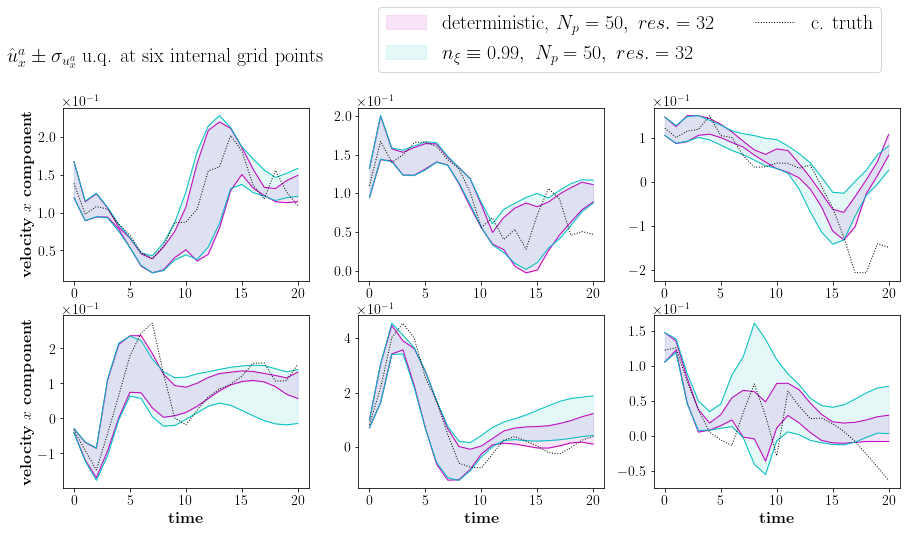

In [33]:
sp = 0 # starting point for plotting results
fig, ax = plt.subplots(2,3, figsize=(15, 7))
obs_p = [14, 42, 70, 50, 78, 64]
n = 0
c1 = "m"
c2 = "c"
# c2 = lime_c
for i in [1,0]:
    for j in [0,1,2]:
        # ax[i,j].plot(ua_det[sp:n_tsteps,obs_p[n],0], label = 'deterministic', linewidth=1, color=lime_c)
        ax[i,j].plot(vel_x_std_plus_p2[sp:,obs_p[n]], color=c1, linewidth=1)
        ax[i,j].plot(vel_x_std_minus_p2[sp:,obs_p[n]], color=c1, linewidth=1)
        ax[i,j].fill_between(np.arange(n_tsteps - sp),vel_x_std_plus_p2[sp:,obs_p[n]],vel_x_std_minus_p2[sp:,obs_p[n]], alpha=.1, color=c1, label=r'deterministic, $N_p = 50, \ res. = 32$' )
        
        ax[i,j].plot(vel_x_std_plus_p1[sp:,obs_p[n]], color=c2, linewidth=1)
        ax[i,j].plot(vel_x_std_minus_p1[sp:,obs_p[n]], color=c2, linewidth=1)
        ax[i,j].fill_between(np.arange(n_tsteps - sp),vel_x_std_plus_p1[sp:,obs_p[n]],vel_x_std_minus_p1[sp:,obs_p[n]], alpha=.1, color=c2, label=r'$n_{\xi}\equiv 0.99 , \ N_p = 50, \ res. = 32$' )

        ax[i,j].plot(ua_truth[sp:n_tsteps,obs_p[n],0], linestyle='dotted',label = 'c. truth', color="black", linewidth=1)
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.65, 1.1), ncol=2) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'$\hat{{u}}_x^a \pm \sigma_{{u}_x^a}$ u.q. at six internal grid points', x = 0.22, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
plt.setp(ax[:, 0], ylabel=r'\bf {velocity} $x$ \bf{component}')
plt.savefig('../plots/rand_ic/uq_ux_det_v_stoch_50_part_var_99_ensem.pdf',bbox_inches='tight')

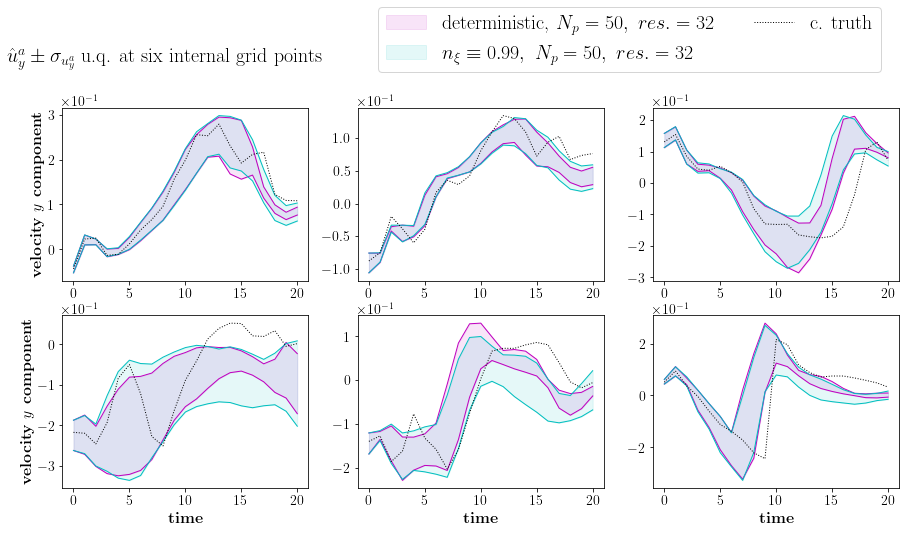

In [27]:
sp = 0 # starting point for plotting results
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
c1 = "m"
c2 = "c"
# c2 = lime_c
for i in [1,0]:
    for j in [0,1,2]:
        # ax[i,j].plot(ua_det[sp:n_tsteps,obs_p[n],0], label = 'deterministic', linewidth=1, color=lime_c)
        ax[i,j].plot(vel_y_std_plus_p2[sp:,obs_p[n]], color=c1, linewidth=1)
        ax[i,j].plot(vel_y_std_minus_p2[sp:,obs_p[n]], color=c1, linewidth=1)
        ax[i,j].fill_between(np.arange(n_tsteps - sp),vel_y_std_plus_p2[sp:,obs_p[n]],vel_y_std_minus_p2[sp:,obs_p[n]], alpha=.1, color=c1, label=r'deterministic, $N_p = 50, \ res. = 32$' )
        
        ax[i,j].plot(vel_y_std_plus_p1[sp:,obs_p[n]], color=c2, linewidth=1)
        ax[i,j].plot(vel_y_std_minus_p1[sp:,obs_p[n]], color=c2, linewidth=1)
        ax[i,j].fill_between(np.arange(n_tsteps - sp),vel_y_std_plus_p1[sp:,obs_p[n]],vel_y_std_minus_p1[sp:,obs_p[n]], alpha=.1, color=c2, label=r'$n_{\xi}\equiv 0.99 , \ N_p = 50, \ res. = 32$' )

        ax[i,j].plot(ua_truth[sp:n_tsteps,obs_p[n],1], linestyle='dotted',label = 'c. truth', color="black", linewidth=1)
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.65, 1.1), ncol=2) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'$\hat{{u}}_y^a \pm \sigma_{{u}_y^a}$ u.q. at six internal grid points', x = 0.22, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
plt.setp(ax[:, 0], ylabel=r'\bf {velocity} $y$ \bf{component}')
plt.savefig('../plots/rand_ic/uq_uy_det_v_stoch_50_part_var_99_ensem.pdf',bbox_inches='tight')

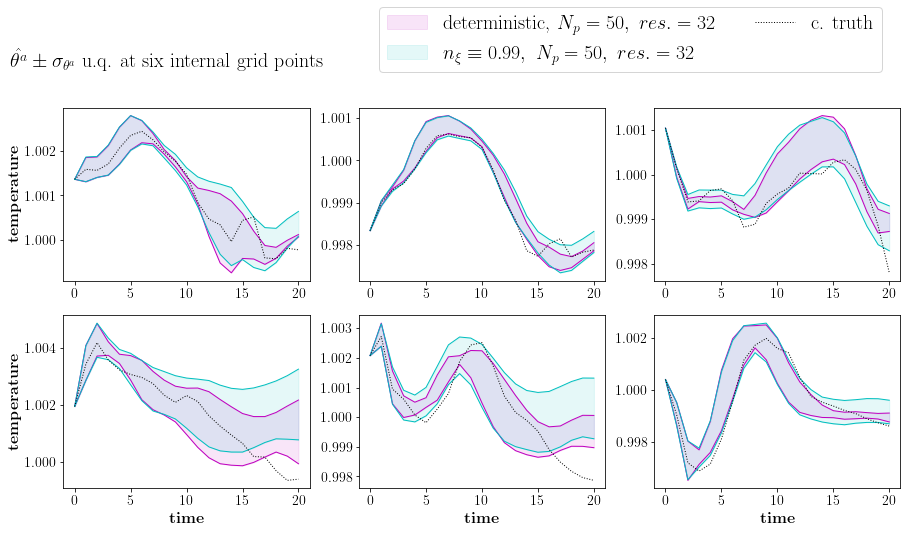

In [34]:
sp = 0 # starting point for plotting results
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
c1 = "m"
c2 = "c"
t_col = "red"
for i in [1,0]:
    for j in [0,1,2]:
        # ax[i,j].plot(Ta_det[sp:n_tsteps,obs_p[n]], label = 'deterministic', linewidth=1, color=lime_c)
        ax[i,j].plot(temp_std_plus_p2[sp:,obs_p[n]], color=c1, linewidth=1)
        ax[i,j].plot(temp_std_minus_p2[sp:,obs_p[n]], color=c1, linewidth=1)
        ax[i,j].fill_between(np.arange(n_tsteps -sp),temp_std_plus_p2[sp:,obs_p[n]],temp_std_minus_p2[sp:,obs_p[n]], alpha=.1, color=c1, label=r'deterministic, $N_p = 50, \ res. = 32$' )

        ax[i,j].plot(temp_std_plus_p1[sp:,obs_p[n]], color=c2, linewidth=1)
        ax[i,j].plot(temp_std_minus_p1[sp:,obs_p[n]], color=c2, linewidth=1)
        ax[i,j].fill_between(np.arange(n_tsteps -sp),temp_std_plus_p1[sp:,obs_p[n]],temp_std_minus_p1[sp:,obs_p[n]], alpha=.1, color=c2, label=r'$n_{\xi}\equiv 0.99, \ N_p = 50, \ res. = 32$' )

        ax[i,j].plot(Ta_truth[sp:n_tsteps,obs_p[n]], label = 'c. truth', linestyle='dotted',color='black', linewidth=1)
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        # print((i,j, n))
        # ax[i,j].legend()
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.65, 1.1), ncol=2)
# set labels
fig.suptitle(r'$\hat{\theta^a} \pm \sigma_{\theta^a}$ u.q. at six internal grid points', x = 0.22, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
plt.setp(ax[:, 0], ylabel=r'${ \bf temperature }$')
plt.savefig('../plots/rand_ic/uq_temp_det_v_stoch_50_part_var_99_ensem.pdf',bbox_inches='tight')